### analyses of historical MJO phase 3 experiments

**Products**: Fig. 1; Fig. S1

In [1]:
import os
import sys
import io
import glob
import numpy as np
import xarray as xr
# import gcsfs

import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as patches
import cartopy.crs as ccrs
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import FormatStrFormatter
from PIL import Image

from datetime import datetime, timedelta

# Add utils directory to Python path
utils_path = os.path.abspath("../utils")
sys.path.append(utils_path)

from generate_z500a_pangu import *
from generate_z500a_era5 import *
from generate_z500a_neuralgcm import *
from plot_res import *

#### 1. read Pangu

In [ ]:
#===================================#
# load exp. outputs
#===================================#
fpath_exp = f'../data/exp_Hist-MJO-P3/'
fname = f'output_upper.Hist-MJO-P3_Pangu.z500a.case-mean.day0-30.nc'

#===== read or create the z500 file =====#
if os.path.exists(fpath_exp + fname):

    print('case-mean z500a found, reading it...')
    ds = xr.open_dataset(fpath_exp + fname)
    z500_pg = ds['z500']
    z500a_pg = ds['z500a']

else:  

    print('case-mean z500a not found, creating it...')
    generate_z500a_pangu()
    create_z500a_casemean_pangu()

case-mean z500a found, reading it...


#### 2. read ERA5

In [ ]:
#===================================#
# load validation data from ERA5
#===================================#
fpath_era = f'../data/ERA5/validation_hist-MJO-P3/'
fname_era = f'era5_z500a_case-mean.day0-30.nc'

#===== read or create the z500a file =====#
if os.path.exists(fpath_era + fname_era):

    print('ERA5 validation z500a found, reading it...')
    ds_era = xr.open_dataset(fpath_era + fname_era)
    z500a_era = ds_era['z500a']
    z500_era = ds_era['z500']

else:
    
    print('ERA5 validation z500a not found, creating it...')
    generate_z500a_era5()
    create_z500a_casemean_era5()

ERA5 validation z500a found, reading it...


#### 3. read NeuralGCM

In [ ]:
#===================================#
# load exp. outputs
#===================================#
fpath_exp = f'../data/exp_Hist-MJO-P3/'
fname = f'output.Historical-MJO-P3_NeuralGCM.z500a.case-mean.day0-30.nc'

#===== read or create the z500 file =====#
if os.path.exists(fpath_exp + fname):

    print('case-mean z500a found, reading it...')
    ds = xr.open_dataset(fpath_exp + fname)
    ds = ds.transpose('time', 'latitude', 'longitude') # transpose the order of lat and lon

    z500_ne = ds['z500']
    z500a_ne = ds['z500a']

else:  

    print('case-mean z500a not found, creating it...')
    generate_z500a_neuralgcm()
    create_z500a_casemean_neuralgcm()

case-mean z500a found, reading it...


#### 4. Visualization

In [ ]:
def plot_z500(fig, ax, z500, title, vlim=0):
        
    ax.set_global()
    ax.coastlines()
    # ax.gridlines(draw_labels=True)

    ax.set_title('')
    ax.set_title(title, loc='center', fontsize=15)

    #=====  set colorbar limits =====#
    if vlim == 0:
        vmax = round(float(z500.sel(latitude=slice(60, -60)).max()) * 1.2)
        vmin = -1*vmax
    else:
        vmax = vlim[1]
        vmin = vlim[0]
    contour_levels = list(np.arange(vmin, vmax*1.01, vmax/20))

    cmap = plt.get_cmap('bwr', 256)
    #===== plot contourf =====#
    contour = ax.contourf(z500.longitude, z500.latitude, z500,  transform=ccrs.PlateCarree(),
                          cmap=cmap, extend='both', levels=contour_levels, vmin=vmin, vmax=vmax)

    #===== add individual colorbar =====#   
    cbar = fig.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, aspect=20, shrink=0.6, label='m')
    cbar.ax.tick_params(labelsize=10)
    cbar.locator = LinearLocator(numticks=5)  # You can change nbins to 4, 6, etc.
    cbar.ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))  # or '%.0f' for integers
    cbar.update_ticks()   

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3879609/99767230.py:17: SyntaxWarning: invalid escape sequence '\m'
  title = f'({panel_num[0][i]}) $\mathbf{{ERA5}}$: Week 1'
/tmp/ipykernel_3879609/99767230.py:39: SyntaxWarning: invalid escape sequence '\m'
  title = f'({panel_num[2][i]}) $\mathbf{{Pangu}}$: Week 1'


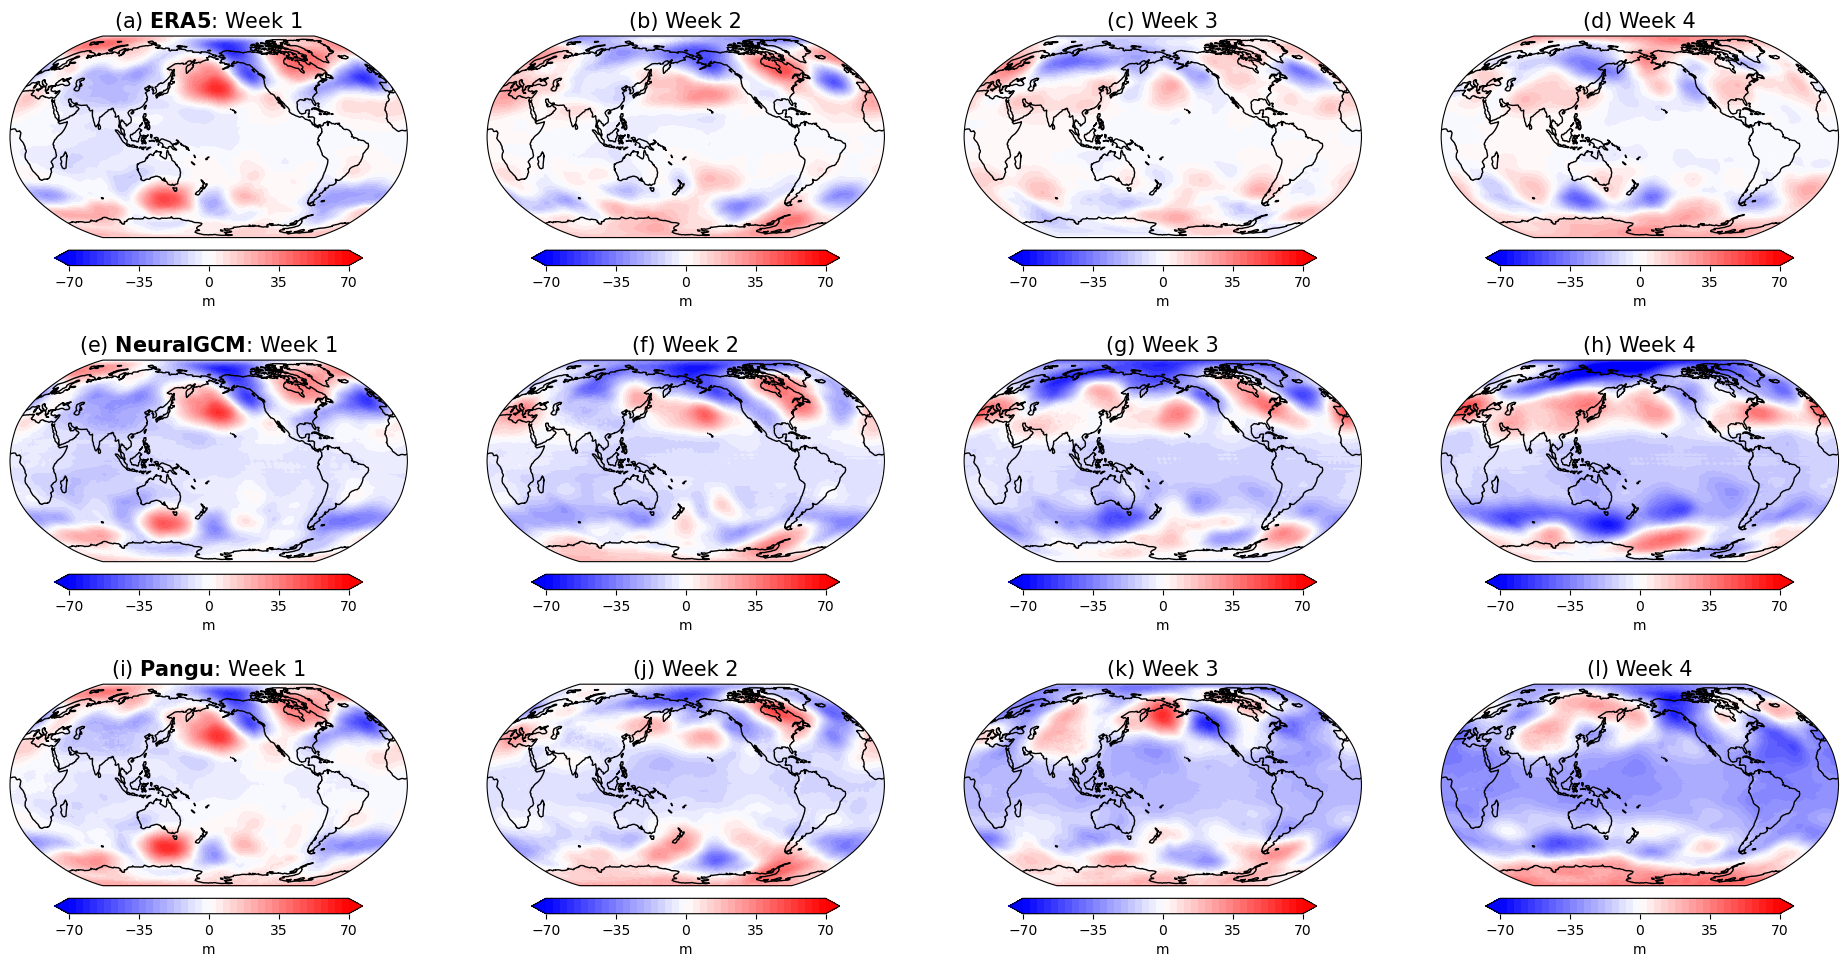

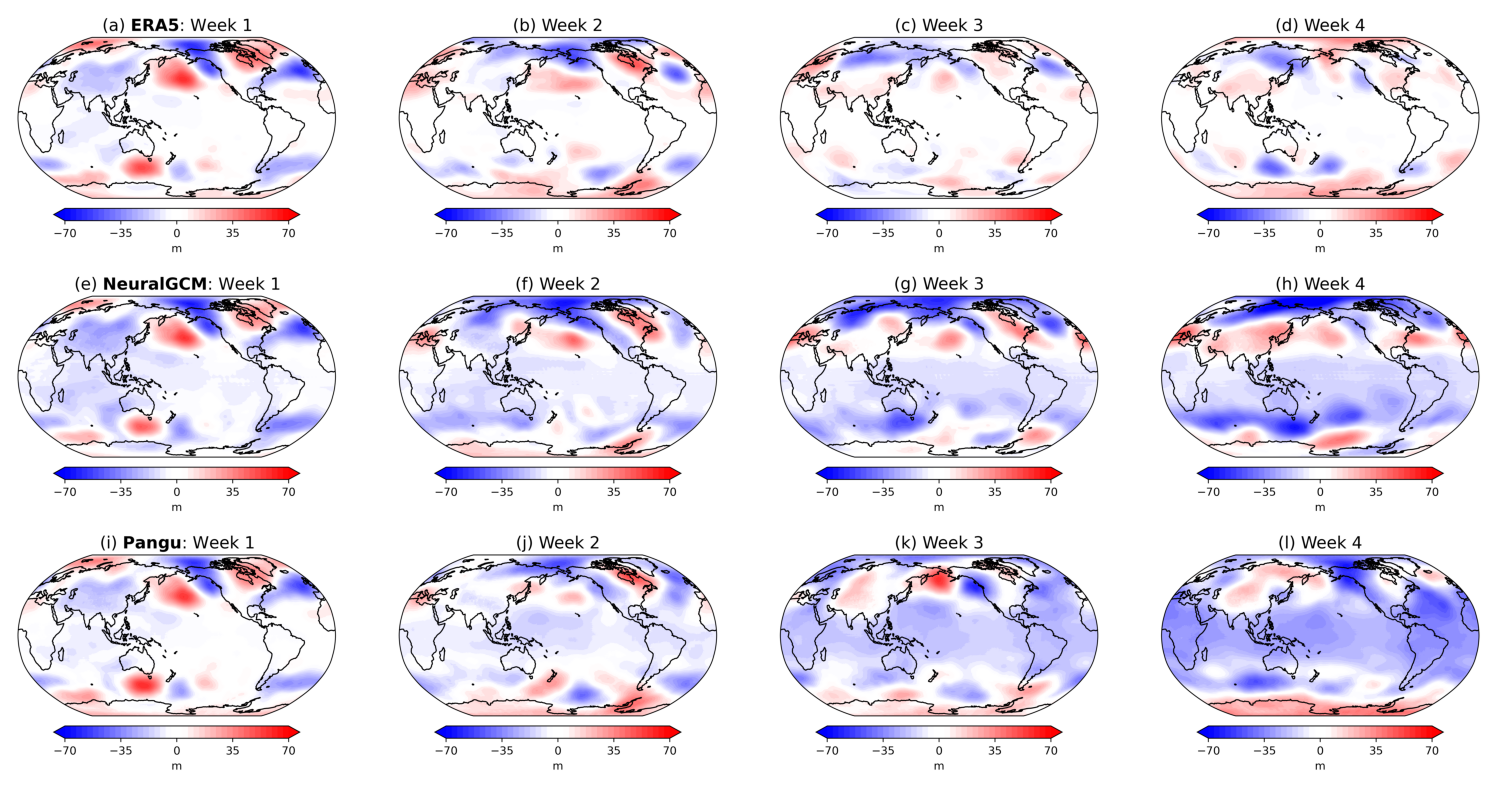

In [8]:
#===================================#
# plot figure1: evolving pattern
#===================================#

proj = ccrs.Robinson(central_longitude=180) 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10), subplot_kw={'projection': proj})

panel_num = [['a', 'b', 'c', 'd'],
             ['e', 'f', 'g', 'h'],
             ['i', 'j', 'k', 'l']]

for i in range(4):
    #===== ERA5 =====#
    z_era = z500a_era.isel(time=slice(i*7+1, (i+1)*7+1)).mean(dim='time')
    
    if i == 0:
        title = f'({panel_num[0][i]}) $\mathbf{{ERA5}}$: Week 1'
    else:
        title = f'({panel_num[0][i]}) Week {i+1}'

    plot_z500(fig, axes[0, i], z_era, title, vlim=[-70, 70])
    
#==================================================================================================#
    #NeuralGCM
    z_ne = z500a_ne.isel(time=slice(i*7+1, (i+1)*7+1)).mean(dim='time')
    
    if i == 0:
        title = rf'({panel_num[1][i]}) $\mathbf{{NeuralGCM}}$: Week 1'
    else:
        title = f'({panel_num[1][i]}) Week {i+1}'

    plot_z500(fig, axes[1, i], z_ne, title, vlim=[-70, 70])

#==================================================================================================#
    #Pangu
    z_pg = z500a_pg.isel(time=slice(i*7+1, (i+1)*7+1)).mean(dim='time')

    if i == 0:
        title = f'({panel_num[2][i]}) $\mathbf{{Pangu}}$: Week 1'
    else:
        title = f'({panel_num[2][i]}) Week {i+1}'

    plot_z500(fig, axes[2, i], z_pg, title, vlim=[-70, 70])



plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout(pad=2.0)

#===== adjust brightness =====#
buf = io.BytesIO()
fig.savefig(buf, format='png', bbox_inches='tight', dpi=400)
buf.seek(0)
image = Image.open(buf).convert('RGB')
bright_image = Image.eval(image, lambda x: min(int(x * 1.07), 255))  # 1.2 = brighten factor
plt.figure(figsize=(20, 10))
plt.imshow(bright_image)
plt.axis('off')

plt.savefig('../analy/figs/Fig_1.png', dpi=400)  # Save as PNG with 300 DPI
plt.show()

## S1. linear detrending

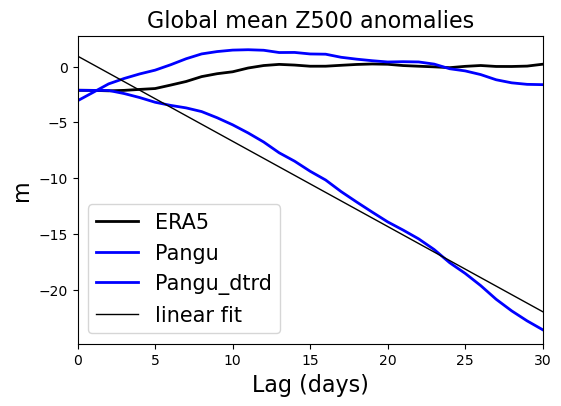

In [141]:
#================================#
# global mean detrending
#================================#
def cal_globalmean(z):
    # calculate the global mean z500a
    wgts = np.cos(np.deg2rad(z.latitude))
    wgts = wgts / wgts.sum()
    z_mean = z.weighted(wgts).mean(dim=['latitude', 'longitude'])
    return z_mean

def cal_dtrd(z):
    # detrend the z500a
    time_num = (z.time - z.time[0]).dt.days

    if z.latitude[0] < z.latitude[1]: 
        z_gmean = cal_globalmean(z)
    else:
        z_gmean = cal_globalmean(z)

    fit = np.polyfit(time_num, z_gmean, 1)

    z_fit = xr.DataArray(np.polyval(fit, time_num), dims = 'time', coords={'time': z.time})
    z_dtrd = z - z_fit# + z_fit.sel(time=z.time[0])

    return z_dtrd, z_fit

z500a_mean_era = cal_globalmean(z500a_era)
z500a_mean_pg = cal_globalmean(z500a_pg)
z500a_mean_ne = cal_globalmean(z500a_ne)

z500a_pg_dtrd, z_fit = cal_dtrd(z500a_pg)
z500a_mean_pg_dtrd = cal_globalmean(z500a_pg_dtrd)


plt.figure(figsize=(6, 4))
time = np.arange(0, 31)
plt.plot(time, z500a_mean_era, lw=2, c='k', label='ERA5')
plt.plot(time, z500a_mean_pg, lw=2, c='b', label='Pangu')
plt.plot(time, z500a_mean_pg_dtrd, lw=2, c='b', label='Pangu_dtrd')
plt.plot(time, z_fit, lw=1, c='k', label='linear fit')

plt.title('Global mean Z500 anomalies', fontsize=16)
plt.ylabel('m', fontsize=16)
plt.xlabel('Lag (days)', fontsize=16)
plt.xlim(0, 30)
plt.legend(fontsize=15)


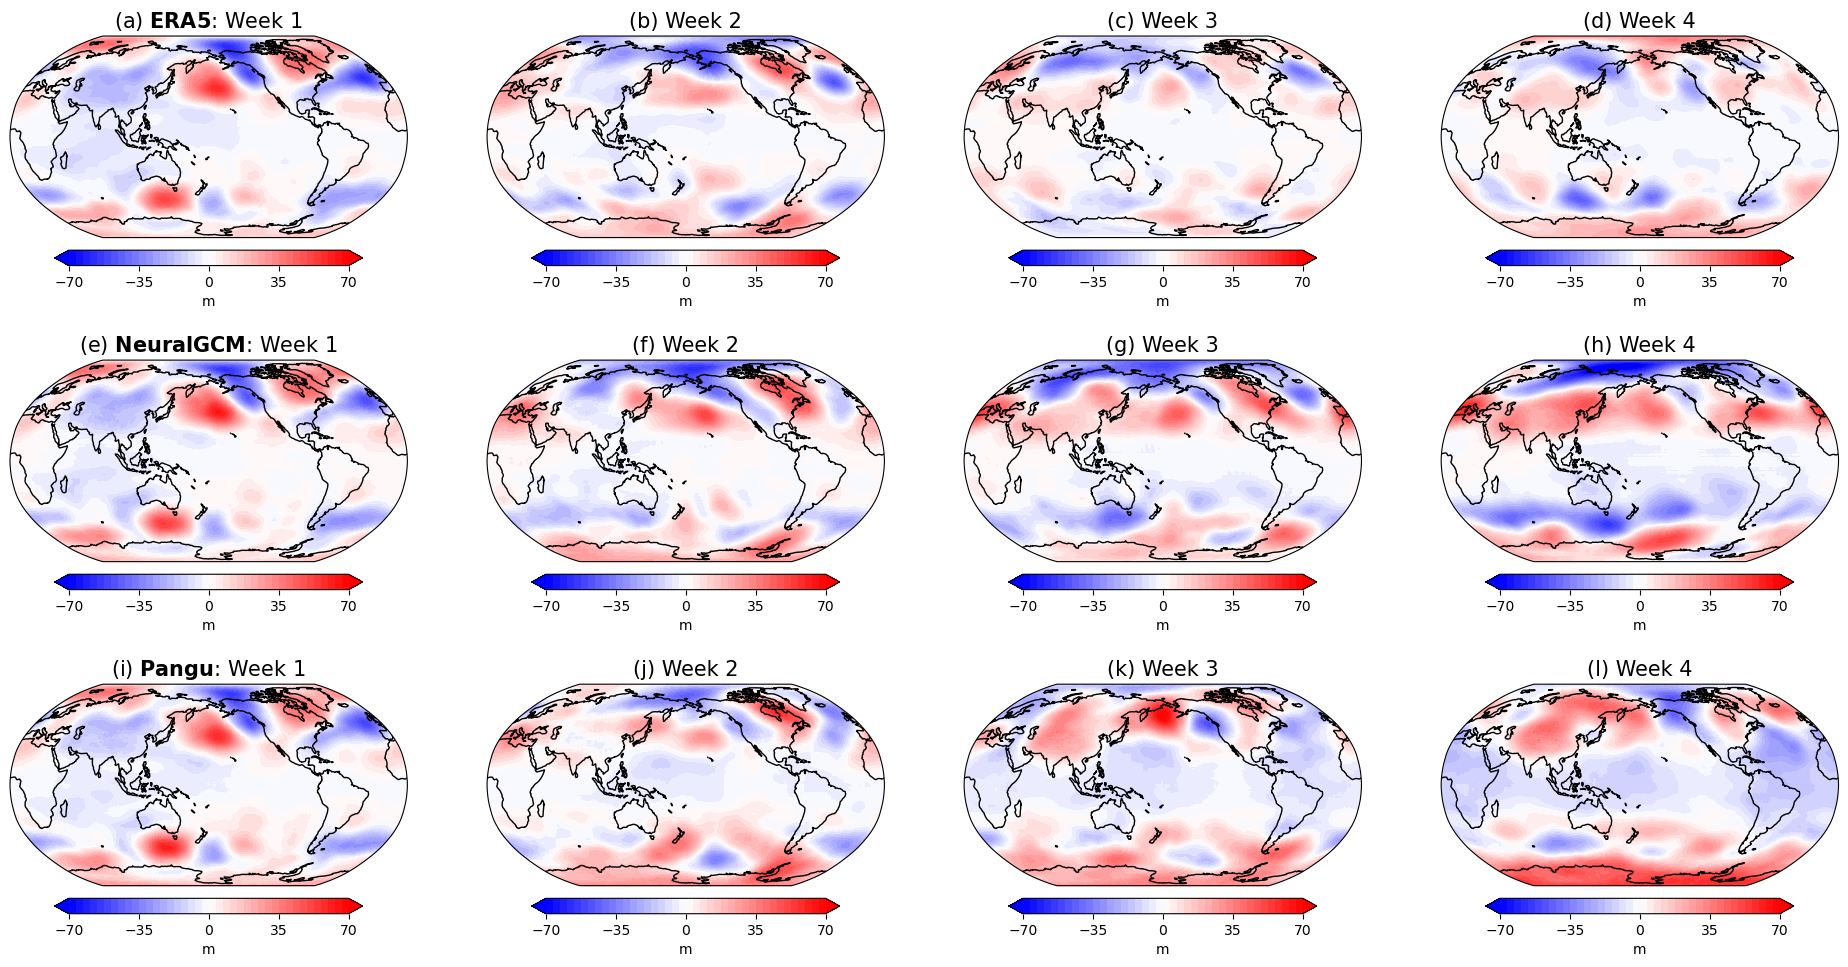

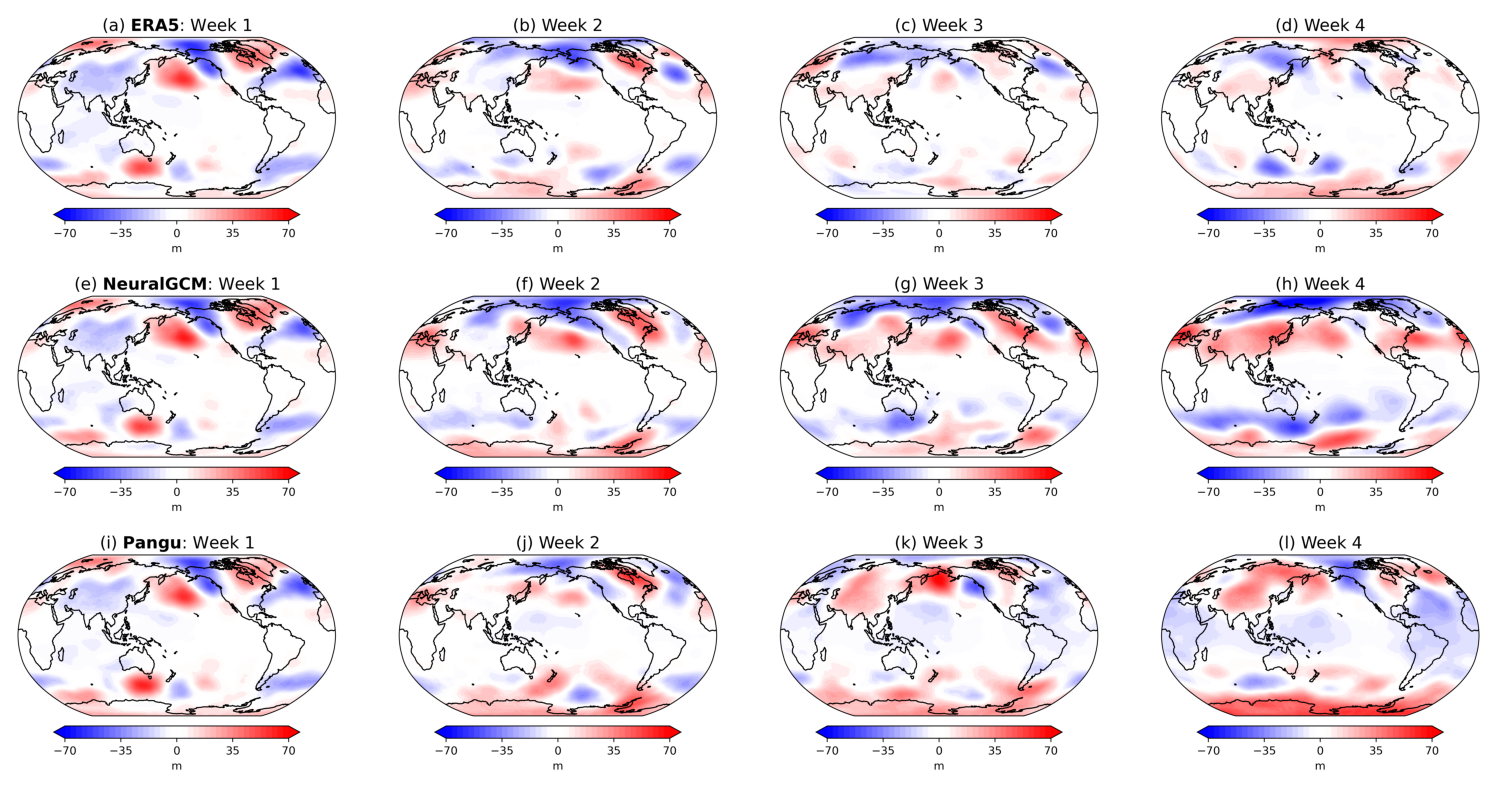

In [142]:
#===================================#
# plot figureS1: evolving pattern detrended
#===================================#
z550a_pg_dtrd = cal_dtrd(z500a_pg)[0]
z500a_ne_dtrd = cal_dtrd(z500a_ne)[0]


proj = ccrs.Robinson(central_longitude=180) 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10), subplot_kw={'projection': proj})

panel_num = [['a', 'b', 'c', 'd'],
             ['e', 'f', 'g', 'h'],
             ['i', 'j', 'k', 'l']]

for i in range(4):
    #===== ERA5 =====#
    z_era = z500a_era.isel(time=slice(i*7+1, (i+1)*7+1)).mean(dim='time')
    
    if i == 0:
        title = rf'({panel_num[0][i]}) $\mathbf{{ERA5}}$: Week 1'
    else:
        title = f'({panel_num[0][i]}) Week {i+1}'

    plot_z500(fig, axes[0, i], z_era, title, vlim=[-70, 70])
    
#==================================================================================================#
    #NeuralGCM
    z_ne = z500a_ne_dtrd.isel(time=slice(i*7+1, (i+1)*7+1)).mean(dim='time')

    if i == 0:
        title = rf'({panel_num[1][i]}) $\mathbf{{NeuralGCM}}$: Week 1'
    else:
        title = f'({panel_num[1][i]}) Week {i+1}'

    plot_z500(fig, axes[1, i], z_ne, title, vlim=[-70, 70])

#==================================================================================================#
    #Pangu
    z_pg = z500a_pg_dtrd.isel(time=slice(i*7+1, (i+1)*7+1)).mean(dim='time')

    if i == 0:
        title = rf'({panel_num[2][i]}) $\mathbf{{Pangu}}$: Week 1'
    else:
        title = f'({panel_num[2][i]}) Week {i+1}'

    plot_z500(fig, axes[2, i], z_pg, title, vlim=[-70, 70])



plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout(pad=2.0)

#===== adjust brightness =====#
buf = io.BytesIO()
fig.savefig(buf, format='png', bbox_inches='tight', dpi=400)
buf.seek(0)
image = Image.open(buf).convert('RGB')
bright_image = Image.eval(image, lambda x: min(int(x * 1.07), 255))  # 1.2 = brighten factor
plt.figure(figsize=(20, 10))
plt.imshow(bright_image)
plt.axis('off')

plt.savefig('../analy/figs/Fig_S1.png', dpi=400)  # Save as PNG with 300 DPI
plt.show()